## analysing data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("india_housing_prices4.csv")

df.columns
df.shape


(302, 4)

In [3]:
df.info()
df.fillna(0)
df.isnull().sum()*100
df.keys()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   City            302 non-null    object
 1   BHK             302 non-null    int64 
 2   Size_in_SqFt    302 non-null    int64 
 3   Price_in_Rupee  302 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


,City,BHK,Size_in_SqFt,Price_in_Rupee
0,Ahmedabad,1,600,4800000
1,Ahmedabad,2,1000,8000000
2,Ahmedabad,3,1400,11200000
3,Ahmedabad,4,1800,14400000
4,Ahmedabad,5,2200,17600000
...,...,...,...,...
297,Kohima,1,1200,3600000
298,Kohima,2,1600,4800000
299,Mumbai,1,1000,10000000
300,Mumbai,2,1500,15000000


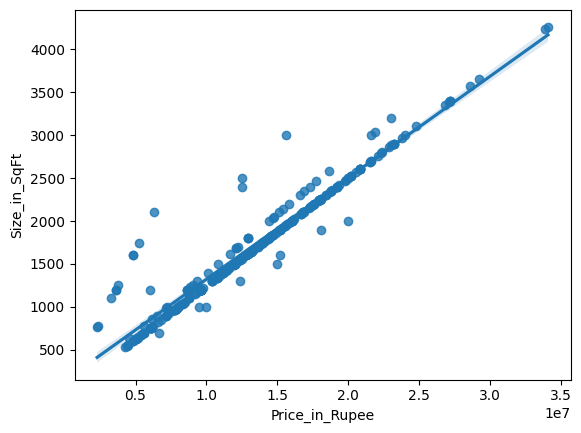

In [4]:

# sns.scatterplot(data=df,x = "Price_in_Rupee" , y="Size_in_SqFt",hue="City")
sns.regplot(data=df,x = "Price_in_Rupee" , y="Size_in_SqFt")
plt.show()

## encoding categorical Values

In [5]:
df.head(5)

,City,BHK,Size_in_SqFt,Price_in_Rupee
0,Ahmedabad,1,600,4800000
1,Ahmedabad,2,1000,8000000
2,Ahmedabad,3,1400,11200000
3,Ahmedabad,4,1800,14400000
4,Ahmedabad,5,2200,17600000


In [6]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
df_encoded = df.copy()
le = LabelEncoder()
df_encoded["City"] = le.fit_transform(df_encoded["City"])
df_encoded.head()


,City,BHK,Size_in_SqFt,Price_in_Rupee
0,2,1,600,4800000
1,2,2,1000,8000000
2,2,3,1400,11200000
3,2,4,1800,14400000
4,2,5,2200,17600000


## Feature Scalling

In [7]:
from sklearn.preprocessing import StandardScaler
input_data = df_encoded.iloc[:,:-1]

output_data = df_encoded["Price_in_Rupee"]
s_scaler =StandardScaler()
input_data = pd.DataFrame(s_scaler.fit_transform(input_data),columns=input_data.columns)
input_data.head()


,City,BHK,Size_in_SqFt
0,-1.622346,-1.352579,-1.530455
1,-1.622346,-0.644644,-0.972356
2,-1.622346,0.063292,-0.414258
3,-1.622346,0.771228,0.143840
4,-1.622346,1.479164,0.701938


## Model Training

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)*100 , model.score(X_test,y_test)*100
# model.predict(X_test)[0]

(92.58998672356897, 94.093897711386)

<Axes: >

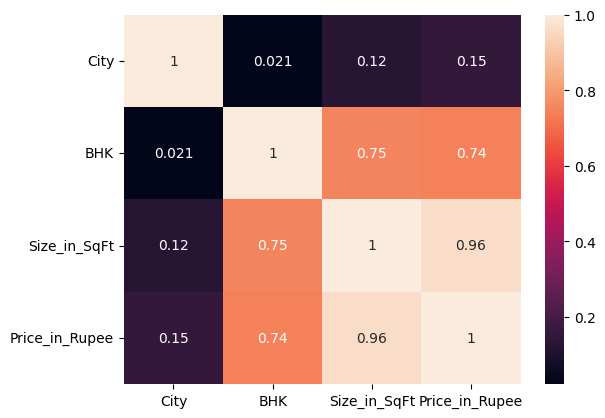

In [10]:
sns.heatmap(data=df_encoded.corr(),annot=True)

## Model Evaluation

In [11]:
#r sqaure value
from sklearn.metrics import r2_score
predictedPriceTrain=model.predict(X_train)
r2_train = r2_score(y_train,predictedPriceTrain)
r2_train


0.9258998672356897

In [12]:
predictedPriceTest=model.predict(X_test)
r2_test = r2_score(y_test,predictedPriceTest)
r2_test

0.9409389771138601

## Building a predictive System


In [13]:
# finding Name of City in Encoded File 
df_City_Encoded = pd.DataFrame()
df_City_Encoded["City"] = df["City"]
df_City_Encoded["City_encoded"] = df_encoded["City"]
df_City_Encoded.drop_duplicates(inplace=True)
df_City_Encoded

inputCity = str(input("Enter Name of City:"))
inputSize = int(input("Enter size of house in sqft:"))
inputbhk = int(input("Enter how much bhk house you  want"))

List = [[],[]]
for City in df_City_Encoded["City"]:
    List[0].append(City)
for City_encoded in df_City_Encoded["City_encoded"]:
    List[1].append(City_encoded)


for i in range(0,len(List[0])):
    if( inputCity.lower()==List[0][i].lower()):
        inputCity=List[1][i]
        break   
if(type(inputCity)!=int):
    inputCity = 0
print(inputCity)

0


In [14]:

model.predict([[inputCity,inputbhk,inputSize]])[0]/1000


c:\Users\Lenovo\PythonProjectAdityaSharma\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(12176027.165375374)